<a href="https://colab.research.google.com/github/charlie-aashutosh/charlie/blob/master/insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files
files=files.upload()

Saving insurance2.csv to insurance2.csv


In [0]:
insurance=pd.read_csv("insurance2.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [0]:
corr=insurance.corr()

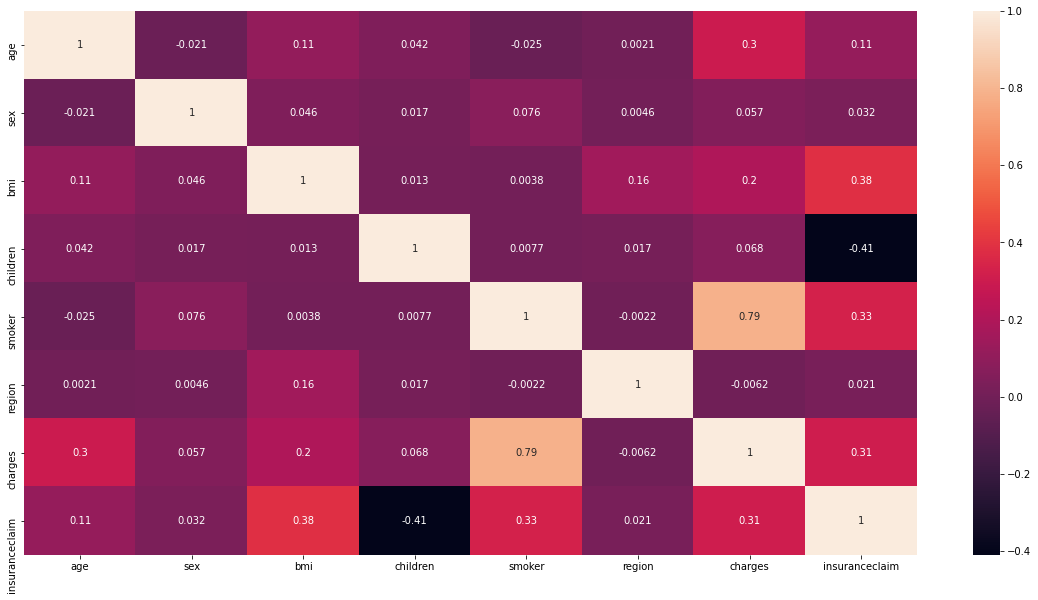

In [26]:
#visualizations using heatmap
%matplotlib inline
plt.figure(figsize=(20,10))
snr.heatmap(insurance.corr(), annot=True)

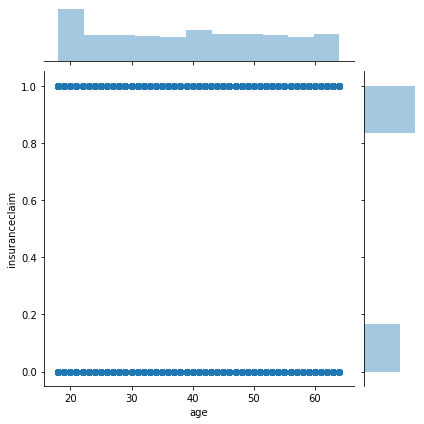

In [11]:
snr.jointplot(x=insurance['age'], y=insurance['insuranceclaim'])

In [0]:
X=insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
y=insurance['insuranceclaim']

In [13]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [0]:
dfTrain=insurance[:1000]
dfTest=insurance[1000:1300]
dfCheck=insurance[1300:]

In [16]:
len(dfTrain)

1000

In [17]:
len(dfCheck)

38

In [0]:
trainLabel=np.asarray(dfTrain['insuranceclaim'])
trainData=np.asarray(dfTrain.drop('insuranceclaim', 1))
testLabel=np.asarray(dfTest['insuranceclaim'])
testData=np.asarray(dfTest.drop('insuranceclaim', 1))

In [0]:
means=np.mean(trainData, axis=0)
stds=np.std(trainData, axis=0)

trainData=(trainData - means)/stds
testData=(testData - means)/stds

In [29]:
insuranceCheck=LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
accuracy=insuranceCheck.score(testData, testLabel)
print("accuracy of model = ", accuracy*100, "%")


accuracy of model =  86.0 %
